In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_frame = pd.read_csv("/content/gdrive/My Drive/ML Project Taxi Fair/train.csv")

In [ ]:
data_frame.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
#Find the NaN of each column
data_frame.isna().sum()

tripid                         0
additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [ ]:
#missing data
total = data_frame.isnull().sum().sort_values(ascending=False)
percent = (data_frame.isnull().sum()/data_frame.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
meter_waiting_till_pickup,202,0.011761
meter_waiting_fare,202,0.011761
meter_waiting,202,0.011761
duration,202,0.011761
additional_fare,202,0.011761
fare,137,0.007976
label,0,0.000000
drop_lon,0,0.000000
drop_lat,0,0.000000
pick_lon,0,0.000000


In [ ]:
data_frame.describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,1.717600e+04,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,2.014549e+08,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,7.456830e+06,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,1.891236e+08,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,1.947619e+08,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,2.013582e+08,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,2.083081e+08,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,2.138173e+08,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


**Try to plot the scatter martrix**

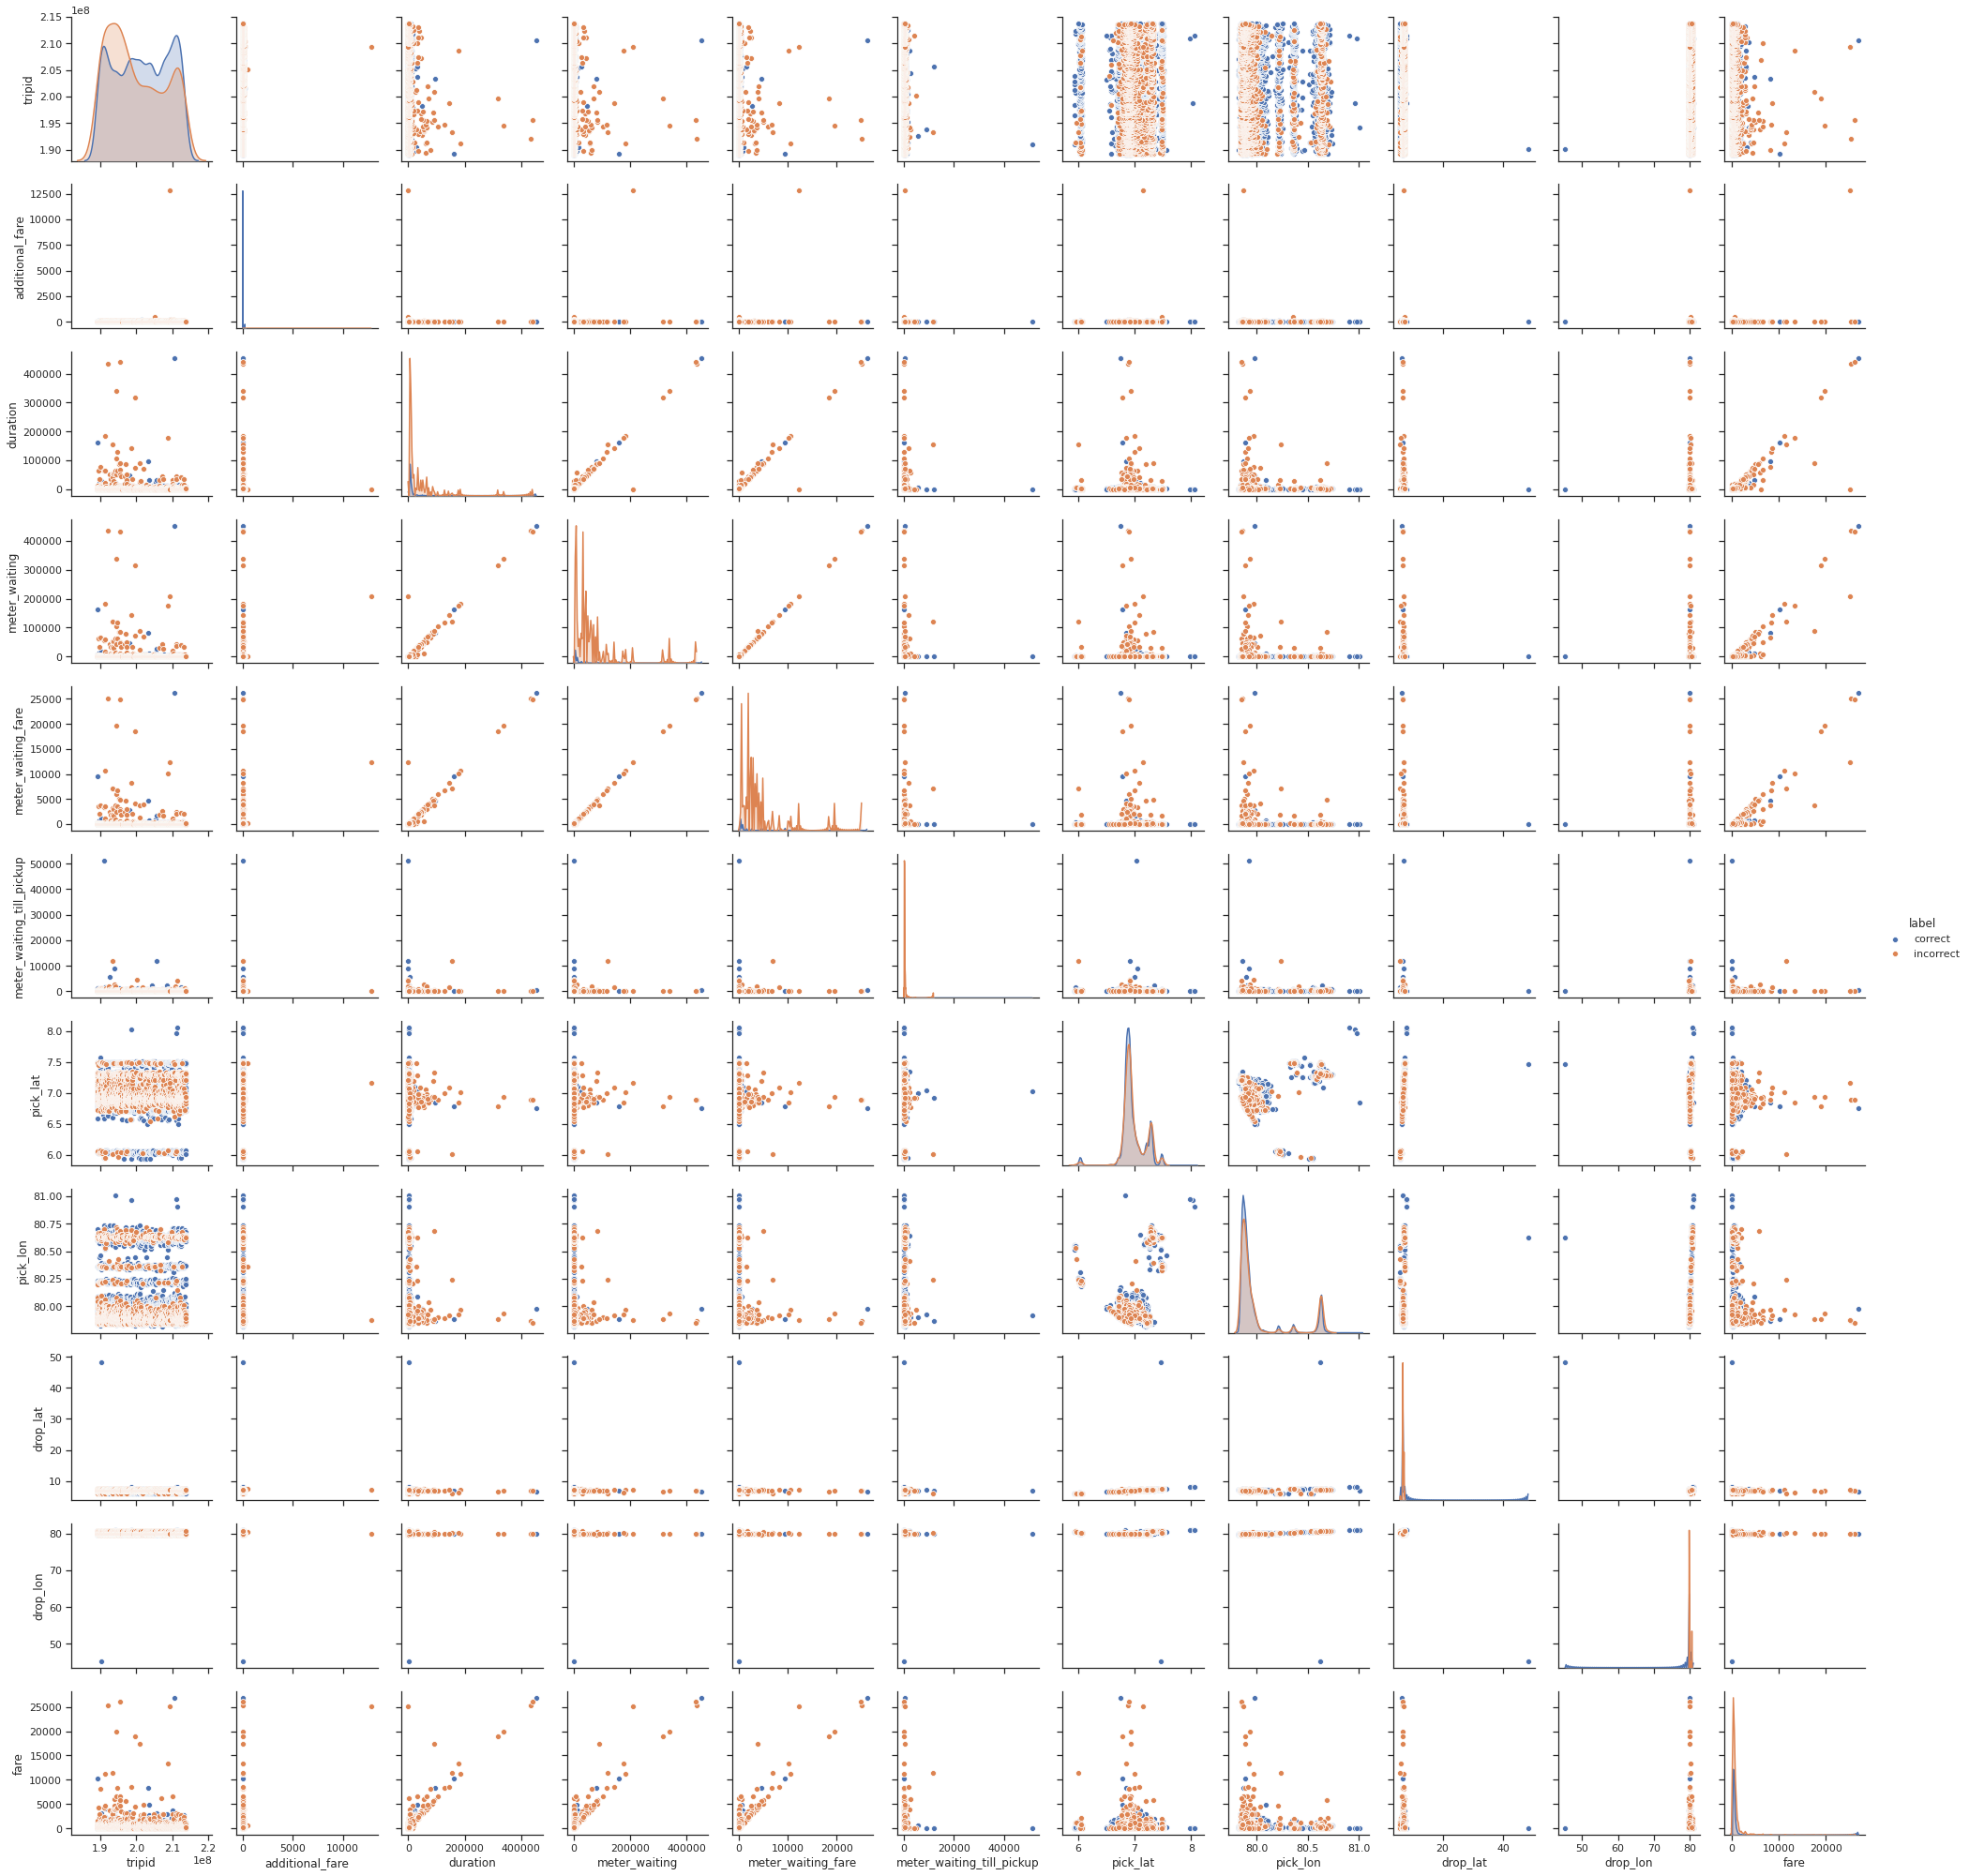

In [ ]:
sns.set(style="ticks")
sns.pairplot(data_frame, hue="label")

In [ ]:
heat_map = data_frame.corr()

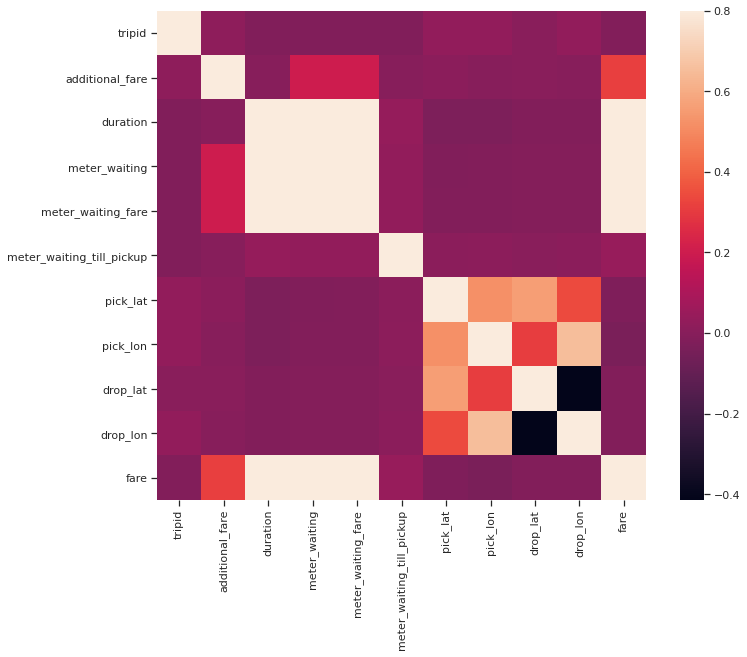

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(heat_map, vmax=.8, square=True, fmt='.2f')

High correlation between.


*   meter_waiting_fare, duration (0.9686)
*   meter_waiting_fare, meter_waiting (0.9999)
*   meter_waiting, duration (0.96978)
*   pick_lat, pick_lon (0.52247)
*   pick_lon, drop_lon (0.654917)
*   pick_lat, drop_lat (0.52247)
*   Fair, duration (0.865256)
*   Fair, meter_waiting (0.870126)
*   Fair, meter_waiting_fare (0.865073)












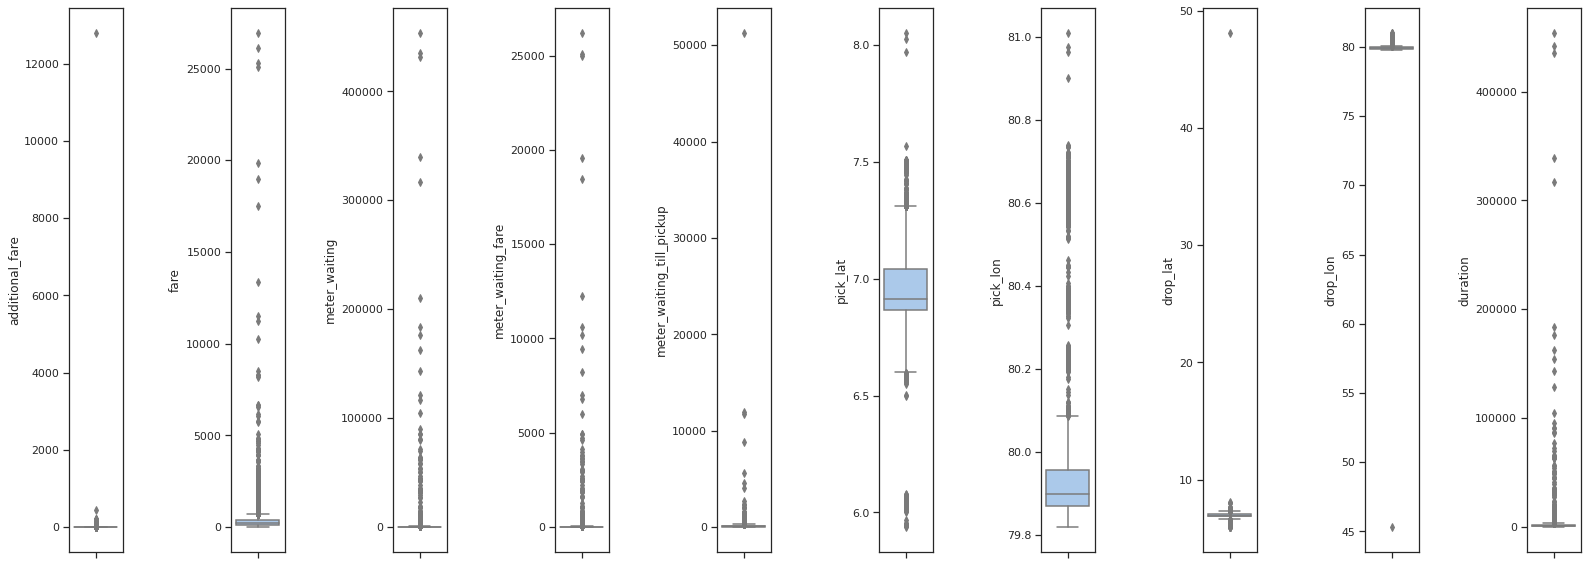

In [ ]:
f, ax = plt.subplots(1,10, figsize=(10,10),)

plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=2, hspace=2)
sns.set(style="ticks", palette="pastel")
sns.boxplot(data_frame['additional_fare'],ax=ax[0], orient='v')
sns.boxplot(data_frame['fare'],ax=ax[1], orient='v')
sns.boxplot(data_frame['meter_waiting'],ax=ax[2], orient='v')
sns.boxplot(data_frame['meter_waiting_fare'],ax=ax[3], orient='v')
sns.boxplot(data_frame['meter_waiting_till_pickup'],ax=ax[4], orient='v')
sns.boxplot(data_frame['pick_lat'],ax=ax[5], orient='v')
sns.boxplot(data_frame['pick_lon'],ax=ax[6], orient='v')
sns.boxplot(data_frame['drop_lat'],ax=ax[7], orient='v')
sns.boxplot(data_frame['drop_lon'],ax=ax[8], orient='v')
sns.boxplot(data_frame['duration'],ax=ax[9], orient='v')
plt.show()

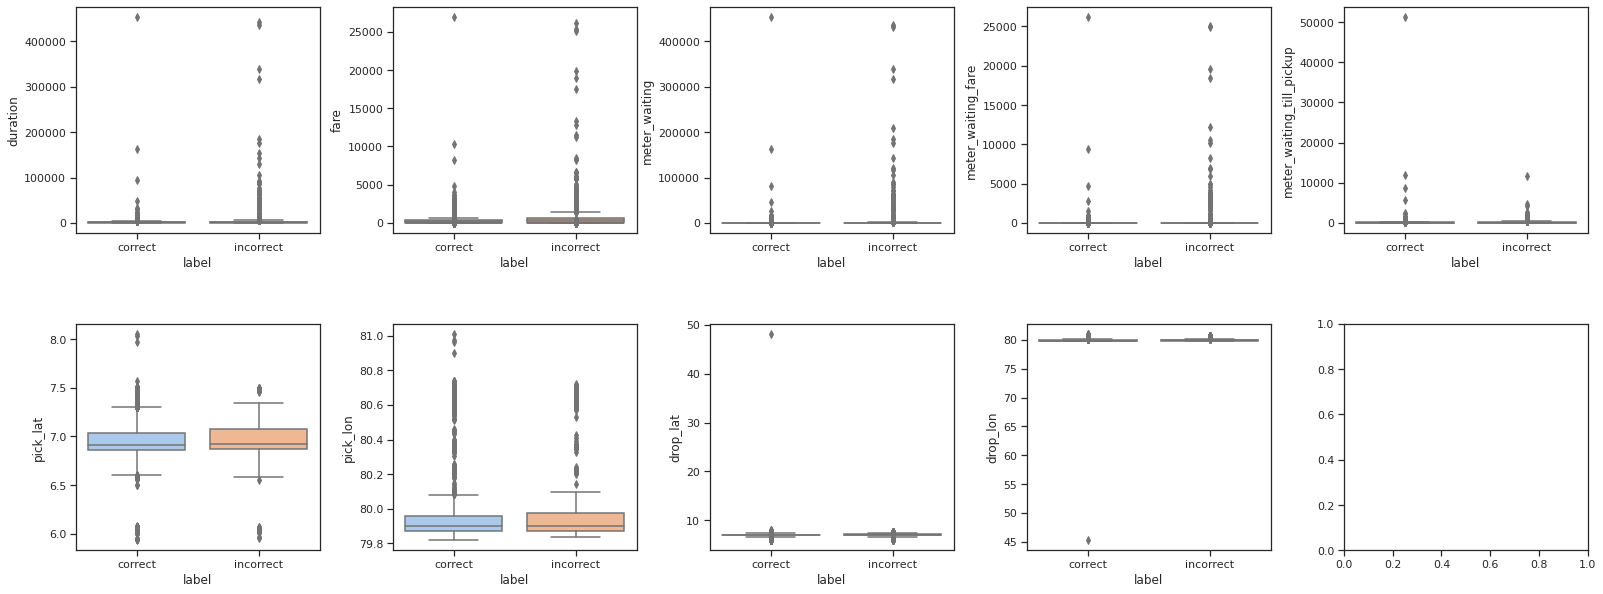

In [ ]:
f, ax = plt.subplots(2,5, figsize=(10,10),)

plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=0.3, hspace=0.4)
sns.set(style="ticks", palette="pastel")
sns.boxplot(data=data_frame,ax=ax[0,1], x='label',y='additional_fare')
sns.boxplot(data=data_frame,ax=ax[0,1], orient='v' , x='label', y='fare')
sns.boxplot(data=data_frame,ax=ax[0,2], orient='v' , x='label', y='meter_waiting')
sns.boxplot(data=data_frame,ax=ax[0,3], orient='v' , x='label', y='meter_waiting_fare')
sns.boxplot(data=data_frame,ax=ax[0,4], orient='v' , x='label', y='meter_waiting_till_pickup')
sns.boxplot(data=data_frame,ax=ax[1,0], orient='v' , x='label', y='pick_lat')
sns.boxplot(data=data_frame,ax=ax[1,1], orient='v' , x='label', y='pick_lon')
sns.boxplot(data=data_frame,ax=ax[1,2], orient='v' , x='label', y='drop_lat')
sns.boxplot(data=data_frame,ax=ax[1,3], orient='v', x='label', y='drop_lon')
sns.boxplot(data=data_frame,ax=ax[0,0], orient='v', x='label', y='duration')
plt.show()

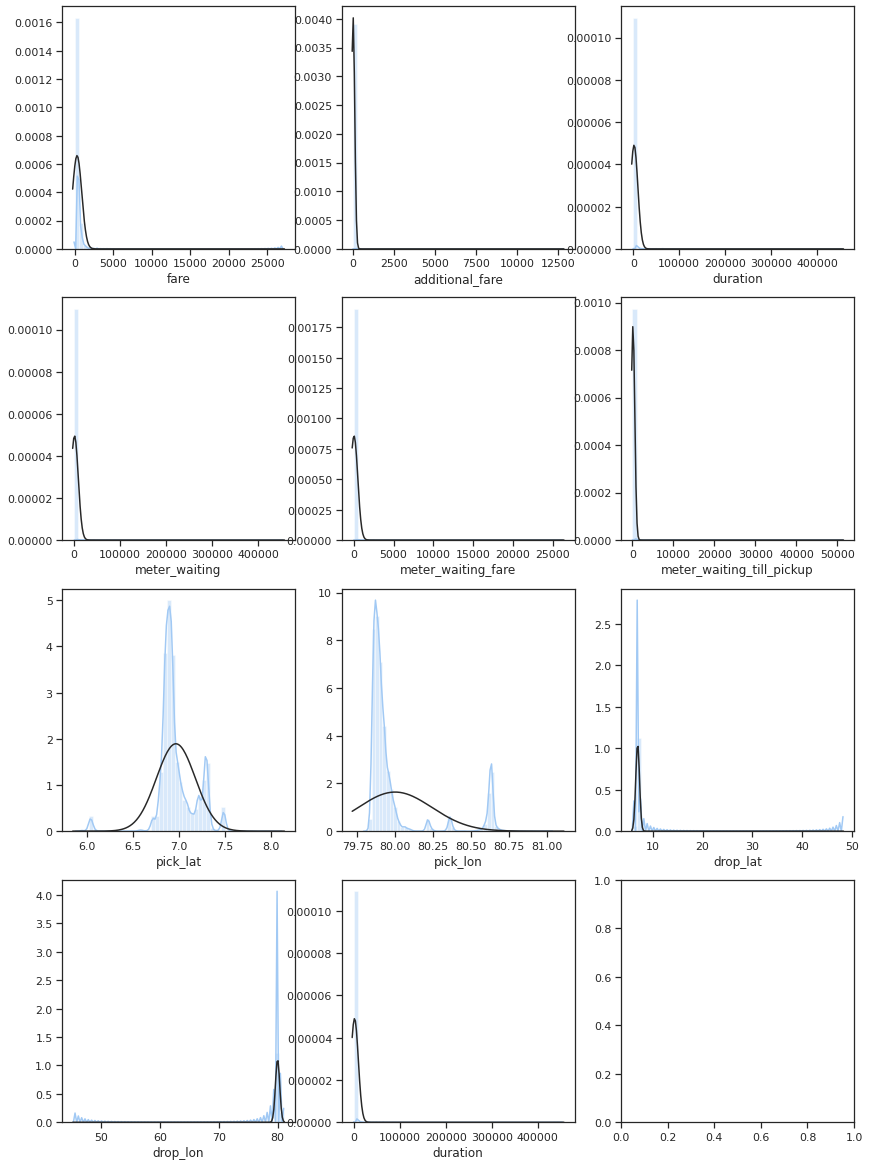

In [ ]:
#Histograms

f, axes = plt.subplots(4,3, figsize=(10,20),)
plt.subplots_adjust(left=0.9, bottom=None, right=2, top=0.9, wspace=0.2, hspace=0.2)
sns.distplot(data_frame['fare'], kde=True, color="b", ax=axes[0, 0],fit=norm)
sns.distplot(data_frame['additional_fare'], kde=True, color="b", ax=axes[0, 1],fit=norm)
sns.distplot(data_frame['duration'], kde=True, color="b", ax=axes[0, 2],fit=norm)
sns.distplot(data_frame['meter_waiting'], kde=True, color="b", ax=axes[1, 0],fit=norm)
sns.distplot(data_frame['meter_waiting_fare'], kde=True, color="b", ax=axes[1, 1],fit=norm)
sns.distplot(data_frame['meter_waiting_till_pickup'], kde=True, color="b", ax=axes[1, 2],fit=norm)
sns.distplot(data_frame['pick_lat'], kde=True, color="b", ax=axes[2, 0],fit=norm)
sns.distplot(data_frame['pick_lon'], kde=True, color="b", ax=axes[2, 1],fit=norm)
sns.distplot(data_frame['drop_lat'], kde=True, color="b", ax=axes[2, 2],fit=norm)
sns.distplot(data_frame['drop_lon'], kde=True, color="b", ax=axes[3, 0],fit=norm)
sns.distplot(data_frame['duration'], kde=True, color="b", ax=axes[3, 1],fit=norm)
#sns.distplot(data_frame['label'], kde=False, color="b", ax=axes[3, 1])
plt.show()

**Some of the data points are negative values**

In [ ]:
columns = ['additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat',
       'pick_lon', 'drop_lat', 'drop_lon', 'fare']

for column in columns:
  count = data_frame[data_frame[column] ==0].shape[0]
  prec = count *100/data_frame.shape[0]
  print("Zero points : {0} => {1} : {2} %".format(column, count, prec))

Zero points : additional_fare => 14 : 0.0815090824406148 %
Zero points : duration => 2 : 0.011644154634373545 %
Zero points : meter_waiting => 729 : 4.244294364229157 %
Zero points : meter_waiting_fare => 8442 : 49.149976711690734 %
Zero points : meter_waiting_till_pickup => 1330 : 7.743362831858407 %
Zero points : pick_lat => 0 : 0.0 %
Zero points : pick_lon => 0 : 0.0 %
Zero points : drop_lat => 0 : 0.0 %
Zero points : drop_lon => 0 : 0.0 %
Zero points : fare => 14 : 0.0815090824406148 %


 **1.Fare can't be zero , 14 data points are zero.**

 **2.Duration can't be zero, 2 points are xero.**




In [ ]:
#Find te data points that voilate meter_waiting > 0 but meter_waiting_fare  == 0
df_ts = data_frame[data_frame['meter_waiting'] !=0]
count = df_ts[df_ts['meter_waiting_fare'] == 0].shape[0]
prec = count *100/data_frame.shape[0]
print("Violated points : {0} => {1} : {2} %".format(column, count, prec))

Violated points : fare => 7713 : 44.90568234746157 %


Find te data points that voilate meter_waiting > 0 but meter_waiting_fare  == 0

**Violated points : fare => 7713 : 44.90568234746157 %**

In [ ]:
df_ts = data_frame[data_frame['meter_waiting'] !=0]
count = df_ts[df_ts['meter_waiting_fare'] == 0]
count.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
5,189129552,10.5,3407.0,182.0,0.0,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct
6,189132829,10.5,1246.0,487.0,0.0,133.0,11/1/2019 6:29,11/1/2019 6:49,6.84371,79.9051,6.85069,79.8624,266.62,correct


In [ ]:
columns = ['additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat',
       'pick_lon', 'drop_lat', 'drop_lon', 'fare']

for column in columns:
  count = data_frame[data_frame[column] <0].shape[0]
  prec = count *100/data_frame.shape[0]
  print("Negative points : {0} => {1} : {2} %".format(column, count, prec))

Negative points : additional_fare => 0 : 0.0 %
Negative points : duration => 0 : 0.0 %
Negative points : meter_waiting => 0 : 0.0 %
Negative points : meter_waiting_fare => 0 : 0.0 %
Negative points : meter_waiting_till_pickup => 0 : 0.0 %
Negative points : pick_lat => 0 : 0.0 %
Negative points : pick_lon => 0 : 0.0 %
Negative points : drop_lat => 0 : 0.0 %
Negative points : drop_lon => 0 : 0.0 %
Negative points : fare => 0 : 0.0 %


In [ ]:
#before convert to log scale remove NaN
data_frame.dropna(subset=['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare'], inplace=True)

In [ ]:
#In here try convert time stamp columns to unix epoch
import time
from datetime import datetime, timedelta

def timeToEpoch(t):
  
  ts = time.strptime(t, '%m/%d/%Y  %H:%M')
  
  timestamp = time.mktime(ts)

  return timeStampRound(timestamp)

def timeStampRound(ts):
  ts=datetime.utcfromtimestamp(3600 * ((ts + 1800) // 3600))
  return int(ts.timestamp())

data_frame['pick_epoch'] = data_frame['pickup_time'].apply(timeToEpoch)
data_frame['drop_epoch'] = data_frame['drop_time'].apply(timeToEpoch)

In [ ]:
timeToEpoch('11/1/2019 0:20')

1572566400

In [ ]:
#Load new dataframe
data_frame.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pick_epoch,drop_epoch
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct,1572566400,1572570000
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct,1572570000,1572570000
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct,1572570000,1572570000
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct,1572573600,1572577200
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct,1572588000,1572591600


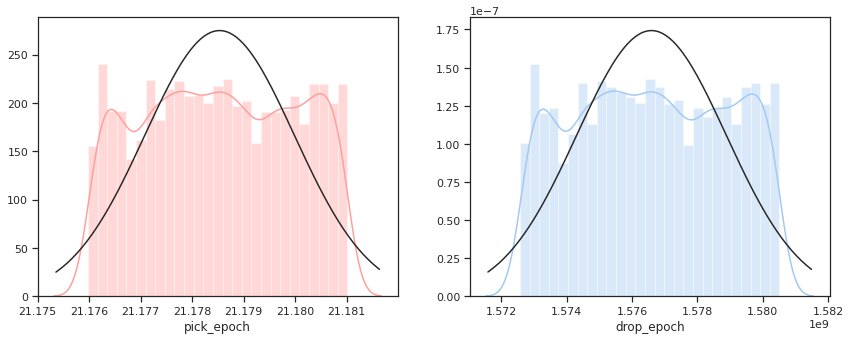

In [ ]:
#Plot the epoch histograms
#Histograms

f, axes = plt.subplots(1,2, figsize=(10,5),)
plt.subplots_adjust(left=0.9, bottom=None, right=2, top=0.9, wspace=0.2, hspace=0.2)
sns.distplot(np.log(data_frame['pick_epoch']), kde=True, color="r", ax=axes[ 0],fit=norm)
sns.distplot(data_frame['drop_epoch'], kde=True, color="b", ax=axes[1],fit=norm)

In [ ]:
#Try to drop NaN columns and train
temp_df = data_frame.dropna(subset=['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare'])
temp_df = temp_df.drop(columns=['tripid','pickup_time','drop_time'])

In [ ]:
temp_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,10.5,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,10.5,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,10.5,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,correct
5,10.5,3407.0,182.0,0.0000,112.0,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [ ]:
temp_df.shape

(16968, 11)

In [ ]:
def encoding_label(label):
  if(label=='correct'):
    return 1
  else:
    return 0
X = temp_df.drop(columns=['label']).values
Y = temp_df['label'].apply(encoding_label).values


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

LR: 0.956175 (0.001593)
LDA: 0.953610 (0.001346)
KNN: 0.969918 (0.001175)
CART: 0.954582 (0.004285)
NB: 0.952217 (0.002011)


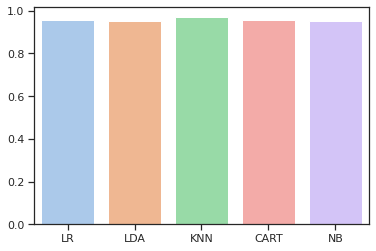

In [ ]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma=0.05, kernel='linear')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
sns.barplot(x=np.array(['LR','LDA','KNN','CART','NB']),y=[r.mean() for r in results])

In [ ]:
#Test set acuracy 
from sklearn.metrics import accuracy_score, f1_score
for model in models:
  model[1].fit(X_train, Y_train)
#for k in range(0,len(X_train)):
for model in models:

  print("Score accuracy {0}: {1}".format(model[0],f1_score(model[1].predict(X_validation), Y_validation)))

Score accuracy LR: 0.9537465309898242
Score accuracy LDA: 0.9540176497909894
Score accuracy KNN: 0.951937984496124
Score accuracy CART: 0.9496753246753246
Score accuracy NB: 0.9547286821705427


In [ ]:
#Try to max voting bagging
from sklearn.metrics import accuracy_score, f1_score
for model in models:
  model[1].fit(X_train, Y_train)

Y_predictions = []
for k in range(0,len(X_validation)):
  data_point = X_validation[k]
  vote_1 = 0
  vote_0 = 0
  for model in models:
    prediction = model[1].predict([data_point])
    if(prediction[0]==1):
      vote_1 += 1
    else:
      vote_0 += 1
  if(vote_1>vote_0):
    Y_predictions.append(1)
  else:
    Y_predictions.append(0)

print("Score accuracy {0}: {1}".format(model[0],f1_score(Y_predictions, Y_validation)))

Score accuracy NB: 0.9542927733168622


In [ ]:
#Try grid search
from sklearn.model_selection import GridSearchCV
parameters = {'C' : [10,1,0.1,0.01,0.00,0.001],'penalty':['l1'], 'solver' : ['newton-cg','saga','sag']}
clf = GridSearchCV(models[0][1], parameters, scoring='f1')
clf.fit(X_train,Y_train)
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.best_score_

0.9539137492723662

In [ ]:
#Testing frame
test_frame = pd.read_csv("/content/gdrive/My Drive/ML Project Taxi Fair/test.csv")
trip_ids = test_frame['tripid']

test_frame['pick_epoch'] = test_frame['pickup_time'].apply(timeToEpoch)
test_frame['drop_epoch'] = test_frame['drop_time'].apply(timeToEpoch)

test_frame.drop(columns=['tripid','pickup_time','drop_time'], inplace=True)

X_test = test_frame.values
predicted = models[0][1].predict(X_test)

data_dict = { 'trip_id':trip_ids, 'prediction':predicted}
pd_test_result = pd.DataFrame(data=data_dict)

pd_test_result.to_csv('/content/gdrive/My Drive/ML Project Taxi Fair/sample_submission.csv')